参考链接：https://zhuanlan.zhihu.com/p/162001079

**导入基础包**

In [7]:
#packages
import pandas as pd
import numpy as np

from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**读取数据**

In [8]:
df = pd.read_csv('data_features_Order.csv') 

In [9]:
df.head()

,Unnamed: 0,Sample ID,Sampling month average,Sampling month,SRTd,COD,NH4N,TP,Unclassified,Burkholderiales,...,Syntrophorhabdales,Bradymonadales,Solibacterales,Methylacidiphilales,UASB-TL25,Calditrichales,Reyranellales,Dongiales,Chthonomonadales,Candidatus Yanofskybacteria
0,0,SAKR1,18.0,55.0,12.0,771.97,61.4,7.2,8.265625,23.570312,...,0.000000,0.042969,0.027344,0.136719,0.058594,0.0,0.109375,0.046875,0.0,0.0
1,1,SAKR2,18.0,55.0,12.0,771.97,61.4,7.2,8.484375,18.730469,...,0.007812,0.054688,0.054688,0.152344,0.019531,0.0,0.093750,0.093750,0.0,0.0
2,2,SAKR3,18.0,55.0,12.0,771.97,61.4,7.2,8.308594,19.378906,...,0.000000,0.023438,0.031250,0.132812,0.015625,0.0,0.070312,0.058594,0.0,0.0
3,3,SAKR4,18.0,55.0,12.0,771.97,61.4,7.2,8.394531,22.824219,...,0.003906,0.035156,0.054688,0.179688,0.035156,0.0,0.109375,0.093750,0.0,0.0
4,4,SAKR5,18.0,55.0,12.0,771.97,61.4,7.2,8.585938,18.863281,...,0.000000,0.023438,0.039062,0.105469,0.011719,0.0,0.070312,0.082031,0.0,0.0


In [10]:
df.shape

(1186, 179)

In [11]:
df.columns

Index(['Unnamed: 0', 'Sample ID', 'Sampling month average', 'Sampling month',
       'SRTd', 'COD', 'NH4N', 'TP', 'Unclassified', 'Burkholderiales',
       ...
       'Syntrophorhabdales', 'Bradymonadales', 'Solibacterales',
       'Methylacidiphilales', 'UASB-TL25', 'Calditrichales', 'Reyranellales',
       'Dongiales', 'Chthonomonadales', 'Candidatus Yanofskybacteria'],
      dtype='object', length=179)

In [12]:
features = ['Sampling month average', 'Sampling month','SRTd', 'COD', 'NH4N', 'TP']
targets = df.columns.to_numpy()
targets = targets[8:]

**简单的EDA**

In [13]:
df.isnull().sum()

Unnamed: 0                       0
Sample ID                        0
Sampling month average         132
Sampling month                  23
SRTd                           342
                              ... 
Calditrichales                   0
Reyranellales                    0
Dongiales                        0
Chthonomonadales                 0
Candidatus Yanofskybacteria      0
Length: 179, dtype: int64

我们看到预测目标里面没有NA， 不过features里面有NA. 

部分features的空值较多，还不能直接drop. 

考虑给空值部分填充均值。

分拆数据

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


在train data 部分曲均值

In [16]:
train_data[features].mean()

Sampling month average     23.154379
Sampling month            115.381081
SRTd                       15.258321
COD                       430.108594
NH4N                       26.645109
TP                          6.274391
dtype: float64

用这部均值填充NA数据

In [17]:
df['Sampling month average'].fillna(23.154379, inplace = True)
df['Sampling month'].fillna(115.381081, inplace = True)
df['SRTd'].fillna(15.258321, inplace = True)
df['COD'].fillna(430.108594, inplace = True)
df['NH4N'].fillna(26.645109, inplace = True)
df['TP'].fillna(6.274391, inplace = True)

检查NA

In [18]:
df.isnull().sum()

Unnamed: 0                     0
Sample ID                      0
Sampling month average         0
Sampling month                 0
SRTd                           0
                              ..
Calditrichales                 0
Reyranellales                  0
Dongiales                      0
Chthonomonadales               0
Candidatus Yanofskybacteria    0
Length: 179, dtype: int64

重定义训练和测试集

In [19]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


**建模**

In [20]:
from sklearn import linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge #导入岭回归模型
from sklearn.linear_model import SGDRegressor
# XGBoost Classifier
from xgboost import XGBClassifier, XGBRegressor

In [21]:
X_train = train_data[features]
y_train = train_data[targets]
X_test = test_data[features]
y_test = test_data[targets]

In [22]:
xgb =  XGBRegressor(verbosity = 0, silent=True, random_state=42)

In [23]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', xgb)
])

训练模型

In [24]:
model.fit(X_train, y_train)
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.8053


利用训练好的模型做测试

In [25]:
y_preds = model.predict(X_test)

In [26]:
y_preds

array([[5.7709002e+00, 2.3515846e+01, 2.0618690e+01, ..., 1.1715990e-02,
        7.2685396e-04, 1.6291357e-03],
       [8.0674677e+00, 2.2628805e+01, 1.7817982e+01, ..., 1.3771608e-01,
        2.1383972e-03, 1.9230688e-03],
       [8.0674677e+00, 2.2628805e+01, 1.7817982e+01, ..., 1.3771608e-01,
        2.1383972e-03, 1.9230688e-03],
       ...,
       [3.8091691e+00, 2.3905148e+01, 1.6997211e+01, ..., 7.1924761e-02,
        1.6743787e-04, 4.0705048e-04],
       [3.8091691e+00, 2.3905148e+01, 1.6997211e+01, ..., 7.1924761e-02,
        1.6743787e-04, 4.0705048e-04],
       [3.8091691e+00, 2.3905148e+01, 1.6997211e+01, ..., 7.1924761e-02,
        1.6743787e-04, 4.0705048e-04]], dtype=float32)

**结果可视化**

展示第一个ID的预测结果。

In [27]:
y_preds[0]

array([ 5.77090025e+00,  2.35158463e+01,  2.06186905e+01,  1.13060129e+00,
        6.01440072e-01,  4.25047964e-01,  3.15493554e-01,  6.50231934e+00,
        2.94480681e-01,  1.39525175e+00,  2.03455615e+00,  1.07910387e-01,
        8.31271887e-01,  3.01610619e-01,  1.55092335e+00,  4.48462963e-01,
        1.30269575e+00,  1.96450725e-01,  4.86864656e-01,  1.12113261e+00,
        4.09135818e-01,  6.63449705e-01,  7.70885408e-01,  1.04878271e+00,
        4.20920992e+00,  3.77660304e-01,  1.94170326e-02,  6.26842007e-02,
        1.40485436e-01,  3.79240841e-01,  1.54906102e-02,  7.28303432e-01,
        4.97359261e-02,  3.98006767e-01,  9.39413011e-02,  1.78264156e-01,
        3.69907580e-02,  4.16922197e-02,  2.33207699e-02,  2.03504469e-02,
        2.15803766e+00,  9.48867109e-03,  3.16851772e-02,  7.91627765e-01,
        2.23778918e-01,  1.54407963e-01,  6.20965920e-02,  1.06866635e-01,
        2.13033129e-02,  2.62488592e-02,  1.64616907e+00,  1.32473484e-01,
        3.66080403e-01,  

In [28]:
y_test.iloc[0].tolist()

[8.75,
 21.375,
 8.75,
 1.48828125,
 0.84375,
 0.76953125,
 0.3984375,
 3.765625,
 0.36328125,
 1.3671875,
 2.640625,
 0.1171875,
 1.76953125,
 0.48046875,
 1.84375,
 0.3125,
 2.06640625,
 0.0625,
 0.34375,
 0.86328125,
 0.33984375,
 1.0546875,
 1.0390625,
 1.08984375,
 9.6953125,
 0.41015625,
 0.0078125,
 0.0625,
 0.07421875,
 0.28125,
 0.04296875,
 0.609375,
 0.02734375,
 0.58203125,
 0.1875,
 0.15234375,
 0.09765625,
 0.03125,
 0.0234375,
 0.0078125,
 1.6210937500000002,
 0.0078125,
 0.046875,
 1.03125,
 0.19921875,
 0.234375,
 0.078125,
 0.28125,
 0.0234375,
 0.0390625,
 2.94921875,
 0.2109375,
 0.14453125,
 0.4140625,
 0.26171875,
 0.1015625,
 0.4414062499999999,
 0.4921875,
 0.63671875,
 0.30859375,
 0.17578125,
 0.27734375,
 0.01953125,
 0.02734375,
 1.0234375,
 0.0390625,
 1.12890625,
 0.00390625,
 0.08984375,
 0.50390625,
 0.0703125,
 0.0234375,
 0.02734375,
 0.33984375,
 0.05078125,
 0.25,
 1.4453125,
 0.00390625,
 0.6171875,
 0.33203125,
 0.33203125,
 0.83984375,
 0.41796875

In [29]:
c = {"classes":targets,
     "predictions":y_preds[0],
    "real":y_test.iloc[0].tolist() }

In [30]:
com = pd.DataFrame(c)
com = com.set_index('classes')
com

,predictions,real
classes,,
Unclassified,5.770900,8.750000
Burkholderiales,23.515846,21.375000
Chitinophagales,20.618690,8.750000
Others,1.130601,1.488281
Rickettsiales,0.601440,0.843750
...,...,...
Calditrichales,0.001797,0.000000
Reyranellales,0.126869,0.125000
Dongiales,0.011716,0.031250


预测和实际结果的柱状图对比

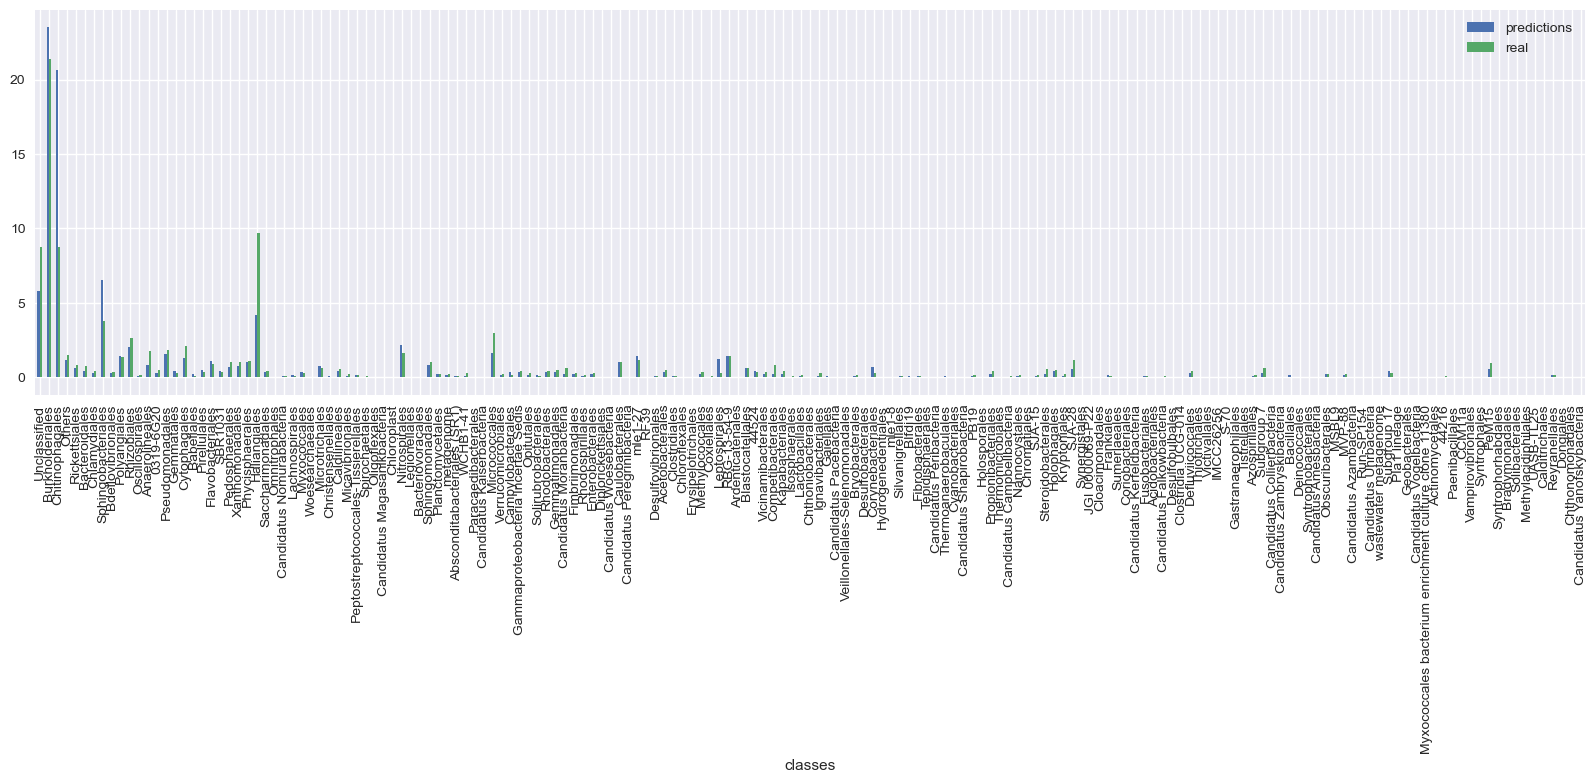

In [31]:
com.plot(kind='bar',figsize=(20,5));

预测和实际结果的散点图对比。

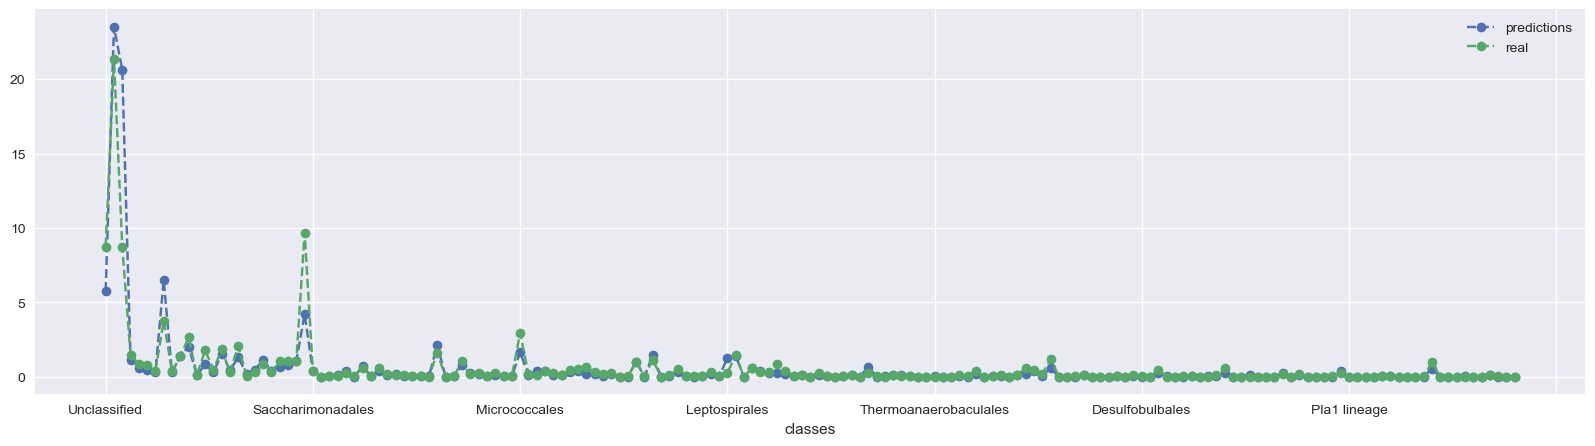

In [32]:
com.plot(kind='line',style='--o',figsize=(20,5));

上面是第一个预测结果和实际结果的对比，修改参数可以对比其他列。也可以汇总对比均值。

**模型评估**

训练集部分

R^2

In [33]:
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.8053


In [34]:
from sklearn import metrics

训练集的MSE

In [35]:
y_preds2 = model.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

0.2408546415889955

测试集部分

In [36]:
MSE = metrics.mean_squared_error(y_test, y_preds)
MSE

3.3915415160423326

In [37]:
RMSE = metrics.mean_squared_error(y_test, y_preds)**0.5
RMSE

1.841613834668477

In [38]:
MAE = metrics.mean_absolute_error(y_test, y_preds)
MAE

0.45948815226472867

In [39]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_preds)
MAPE

101964749663705.31

# 调参和优化

In [40]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

In [41]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [42]:
# Get parameters list
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=42, ...))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylev

In [43]:
# Perform Gridsearch and fit
param_grid = {"regressor__n_estimators": [100,150,300,400,500]}

In [44]:
gs = GridSearchCV(model, param_grid, n_jobs=-1, cv=tscv, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     featu...
                                                     learning

In [45]:
# Best Estimator
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, 

In [46]:
print(f'R^2 Train: {gs.score(X_train, y_train):0.4}')

R^2 Train: 0.8053


R方差别不大

In [47]:
y_preds1 = gs.predict(X_test)

In [48]:
MSE = metrics.mean_squared_error(y_test, y_preds1)
MSE

3.3915415160423326

MSE的差别也不大

In [49]:
y_preds2 = gs.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

0.2408546415889955

训练集和测试集的MSE差别比较大